In [1]:
loan.train <- read.csv("/home/shahan/Documents/Analytics_Vidhya/LoanPrediction/train_u6lujuX_CVtuZ9i.csv")
loan.test <- read.csv("/home/shahan/Documents/Analytics_Vidhya/LoanPrediction/test_Y3wMUE5_7gLdaTN.csv")


In [9]:
library(caret)
library(Metrics)


Attaching package: ‘caret’

The following object is masked from ‘package:survival’:

    cluster



In [6]:
colnames(loan.train)
str(loan.train)




[1] "Loan_ID"           "Gender"            "Married"          
 [4] "Dependents"        "Education"         "Self_Employed"    
 [7] "ApplicantIncome"   "CoapplicantIncome" "LoanAmount"       
[10] "Loan_Amount_Term"  "Credit_History"    "Property_Area"    
[13] "Loan_Status"

'data.frame':	614 obs. of  13 variables:
 $ Loan_ID          : Factor w/ 614 levels "LP001002","LP001003",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Gender           : Factor w/ 3 levels "","Female","Male": 3 3 3 3 3 3 3 3 3 3 ...
 $ Married          : Factor w/ 3 levels "","No","Yes": 2 3 3 3 2 3 3 3 3 3 ...
 $ Dependents       : Factor w/ 5 levels "","0","1","2",..: 2 3 2 2 2 4 2 5 4 3 ...
 $ Education        : Factor w/ 2 levels "Graduate","Not Graduate": 1 1 1 2 1 1 2 1 1 1 ...
 $ Self_Employed    : Factor w/ 3 levels "","No","Yes": 2 2 3 2 2 3 2 2 2 2 ...
 $ ApplicantIncome  : int  5849 4583 3000 2583 6000 5417 2333 3036 4006 12841 ...
 $ CoapplicantIncome: num  0 1508 0 2358 0 ...
 $ LoanAmount       : int  NA 128 66 120 141 267 95 158 168 349 ...
 $ Loan_Amount_Term : int  360 360 360 360 360 360 360 360 360 360 ...
 $ Credit_History   : int  1 1 1 1 1 1 1 0 1 1 ...
 $ Property_Area    : Factor w/ 3 levels "Rural","Semiurban",..: 3 1 3 3 3 3 3 2 3 2 ...
 $ Loan_Status      : Factor w/ 2 le

In [7]:
loan.train.1 <- loan.train
loan.train.1[loan.train.1 == ""] <- NA
summary(loan.train.1)


     Loan_ID       Gender    Married    Dependents        Education  
 LP001002:  1         :  0       :  0       :  0   Graduate    :480  
 LP001003:  1   Female:112   No  :213   0   :345   Not Graduate:134  
 LP001005:  1   Male  :489   Yes :398   1   :102                     
 LP001006:  1   NA's  : 13   NA's:  3   2   :101                     
 LP001008:  1                           3+  : 51                     
 LP001011:  1                           NA's: 15                     
 (Other) :608                                                        
 Self_Employed ApplicantIncome CoapplicantIncome   LoanAmount   
     :  0      Min.   :  150   Min.   :    0     Min.   :  9.0  
 No  :500      1st Qu.: 2878   1st Qu.:    0     1st Qu.:100.0  
 Yes : 82      Median : 3812   Median : 1188     Median :128.0  
 NA's: 32      Mean   : 5403   Mean   : 1621     Mean   :146.4  
               3rd Qu.: 5795   3rd Qu.: 2297     3rd Qu.:168.0  
               Max.   :81000   Max.   :41667     M

In [8]:
loan.test.1 <- loan.test
loan.test.1[loan.test.1==""] <- NA
summary(loan.test.1)

     Loan_ID       Gender    Married   Dependents        Education  
 LP001015:  1         :  0   No :134       :  0   Graduate    :283  
 LP001022:  1   Female: 70   Yes:233   0   :200   Not Graduate: 84  
 LP001031:  1   Male  :286             1   : 58                     
 LP001035:  1   NA's  : 11             2   : 59                     
 LP001051:  1                          3+  : 40                     
 LP001054:  1                          NA's: 10                     
 (Other) :361                                                       
 Self_Employed ApplicantIncome CoapplicantIncome   LoanAmount   
     :  0      Min.   :    0   Min.   :    0     Min.   : 28.0  
 No  :307      1st Qu.: 2864   1st Qu.:    0     1st Qu.:100.2  
 Yes : 37      Median : 3786   Median : 1025     Median :125.0  
 NA's: 23      Mean   : 4806   Mean   : 1570     Mean   :136.1  
               3rd Qu.: 5060   3rd Qu.: 2430     3rd Qu.:158.0  
               Max.   :72529   Max.   :24000     Max.   :5

In [14]:
library(missForest)
train.loan.1 <- missForest(loan.train.1[,-1],maxiter=10, ntree=100,decreasing=FALSE,mtry=floor(sqrt(ncol(loan.train))),replace=TRUE,parallelize = c('no'))
summary(train.loan.1$ximp)
str(train.loan.1$ximp)
train.loan <- train.loan.1$ximp
df_status(train.loan)

  missForest iteration 1 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“The response has five or fewer unique values.  Are you sure you want to do regression?”

done!
  missForest iteration 2 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“The response has five or fewer unique values.  Are you sure you want to do regression?”

done!
  missForest iteration 3 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“The response has five or fewer unique values.  Are you sure you want to do regression?”

done!


    Gender    Married   Dependents        Education   Self_Employed
       :  0      :  0     :  0     Graduate    :480      :  0      
 Female:114   No :215   0 :351     Not Graduate:134   No :531      
 Male  :500   Yes:399   1 :104                        Yes: 83      
                        2 :107                                     
                        3+: 52                                     
                                                                   
 ApplicantIncome CoapplicantIncome   LoanAmount    Loan_Amount_Term
 Min.   :  150   Min.   :    0     Min.   :  9.0   Min.   : 12.0   
 1st Qu.: 2878   1st Qu.:    0     1st Qu.:100.0   1st Qu.:360.0   
 Median : 3812   Median : 1188     Median :128.0   Median :360.0   
 Mean   : 5403   Mean   : 1621     Mean   :146.5   Mean   :341.9   
 3rd Qu.: 5795   3rd Qu.: 2297     3rd Qu.:167.6   3rd Qu.:360.0   
 Max.   :81000   Max.   :41667     Max.   :700.0   Max.   :480.0   
 Credit_History     Property_Area Loan_Status
 M

'data.frame':	614 obs. of  12 variables:
 $ Gender           : Factor w/ 3 levels "","Female","Male": 3 3 3 3 3 3 3 3 3 3 ...
 $ Married          : Factor w/ 3 levels "","No","Yes": 2 3 3 3 2 3 3 3 3 3 ...
 $ Dependents       : Factor w/ 5 levels "","0","1","2",..: 2 3 2 2 2 4 2 5 4 3 ...
 $ Education        : Factor w/ 2 levels "Graduate","Not Graduate": 1 1 1 2 1 1 2 1 1 1 ...
 $ Self_Employed    : Factor w/ 3 levels "","No","Yes": 2 2 3 2 2 3 2 2 2 2 ...
 $ ApplicantIncome  : num  5849 4583 3000 2583 6000 ...
 $ CoapplicantIncome: num  0 1508 0 2358 0 ...
 $ LoanAmount       : num  151 128 66 120 141 ...
 $ Loan_Amount_Term : num  360 360 360 360 360 360 360 360 360 360 ...
 $ Credit_History   : num  1 1 1 1 1 1 1 0 1 1 ...
 $ Property_Area    : Factor w/ 3 levels "Rural","Semiurban",..: 3 1 3 3 3 3 3 2 3 2 ...
 $ Loan_Status      : Factor w/ 2 levels "N","Y": 2 1 2 2 2 2 2 1 2 1 ...
            variable q_zeros p_zeros q_na p_na q_inf p_inf    type unique
1             Gender      

In [40]:
test.loan.1 <- missForest(loan.test.1[,-1],maxiter=10, ntree=100,decreasing=FALSE,mtry=floor(sqrt(ncol(loan.train))),replace=TRUE,parallelize = c('no'))

test.loan <- test.loan.1$ximp
df_status(test.loan)

  missForest iteration 1 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“The response has five or fewer unique values.  Are you sure you want to do regression?”

done!
  missForest iteration 2 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“The response has five or fewer unique values.  Are you sure you want to do regression?”

done!
  missForest iteration 3 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“The response has five or fewer unique values.  Are you sure you want to do regression?”

done!
  missForest iteration 4 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“The response has five or fewer unique values.  Are you sure you want to do regression?”

done!
  missForest iteration 5 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“The response has five or fewer unique values.  Are you sure you want to do regression?”

done!
  missForest iteration 6 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“The response has five or fewer unique values.  Are you sure you want to do regression?”

done!
  missForest iteration 7 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“The response has five or fewer unique values.  Are you sure you want to do regression?”

done!
            variable q_zeros p_zeros q_na p_na q_inf p_inf    type unique
1             Gender       0    0.00    0    0     0     0  factor      2
2            Married       0    0.00    0    0     0     0  factor      2
3         Dependents     206   56.13    0    0     0     0  factor      4
4          Education       0    0.00    0    0     0     0  factor      2
5      Self_Employed       0    0.00    0    0     0     0  factor      2
6    ApplicantIncome       2    0.54    0    0     0     0 numeric    314
7  CoapplicantIncome     156   42.51    0    0     0     0 numeric    194
8         LoanAmount       0    0.00    0    0     0     0 numeric    149
9   Loan_Amount_Term       0    0.00    0    0     0     0 numeric     18
10    Credit_History      59   16.08    0    0     0     0 numeric     31
11     Property_Area       0    0.00    0    0     0     0  factor      3


In [41]:
test.loan$Loan_ID <- loan.test.1$Loan_ID 

In [42]:
df_status(test.loan)

            variable q_zeros p_zeros q_na p_na q_inf p_inf    type unique
1             Gender       0    0.00    0    0     0     0  factor      2
2            Married       0    0.00    0    0     0     0  factor      2
3         Dependents     206   56.13    0    0     0     0  factor      4
4          Education       0    0.00    0    0     0     0  factor      2
5      Self_Employed       0    0.00    0    0     0     0  factor      2
6    ApplicantIncome       2    0.54    0    0     0     0 numeric    314
7  CoapplicantIncome     156   42.51    0    0     0     0 numeric    194
8         LoanAmount       0    0.00    0    0     0     0 numeric    149
9   Loan_Amount_Term       0    0.00    0    0     0     0 numeric     18
10    Credit_History      59   16.08    0    0     0     0 numeric     31
11     Property_Area       0    0.00    0    0     0     0  factor      3
12           Loan_ID       0    0.00    0    0     0     0  factor    367


In [10]:
fitControl <- trainControl(method= "repeatedcv", number=4, repeats = 4)

In [11]:
summary(fitControl)

                  Length Class  Mode     
method            1      -none- character
number            1      -none- numeric  
repeats           1      -none- numeric  
search            1      -none- character
p                 1      -none- numeric  
initialWindow     0      -none- NULL     
horizon           1      -none- numeric  
fixedWindow       1      -none- logical  
skip              1      -none- numeric  
verboseIter       1      -none- logical  
returnData        1      -none- logical  
returnResamp      1      -none- character
savePredictions   1      -none- logical  
classProbs        1      -none- logical  
summaryFunction   1      -none- function 
selectionFunction 1      -none- character
preProcOptions    6      -none- list     
sampling          0      -none- NULL     
index             0      -none- NULL     
indexOut          0      -none- NULL     
indexFinal        0      -none- NULL     
timingSamps       1      -none- numeric  
predictionBounds  2      -none- lo

In [30]:
gbmfit1 <- train(as.factor(Loan_Status)~., data=train.loan, method = "gbm", trControl = fitControl, verbose=F)

,var,rel.inf
Credit_History,Credit_History,81.7694159
Property_AreaSemiurban,Property_AreaSemiurban,4.3037998
LoanAmount,LoanAmount,3.9705745
CoapplicantIncome,CoapplicantIncome,2.5916703
ApplicantIncome,ApplicantIncome,2.2310202
Loan_Amount_Term,Loan_Amount_Term,1.5629207
EducationNot Graduate,EducationNot Graduate,1.0887386
MarriedNo,MarriedNo,0.9586001
MarriedYes,MarriedYes,0.8853640
Self_EmployedNo,Self_EmployedNo,0.6378960


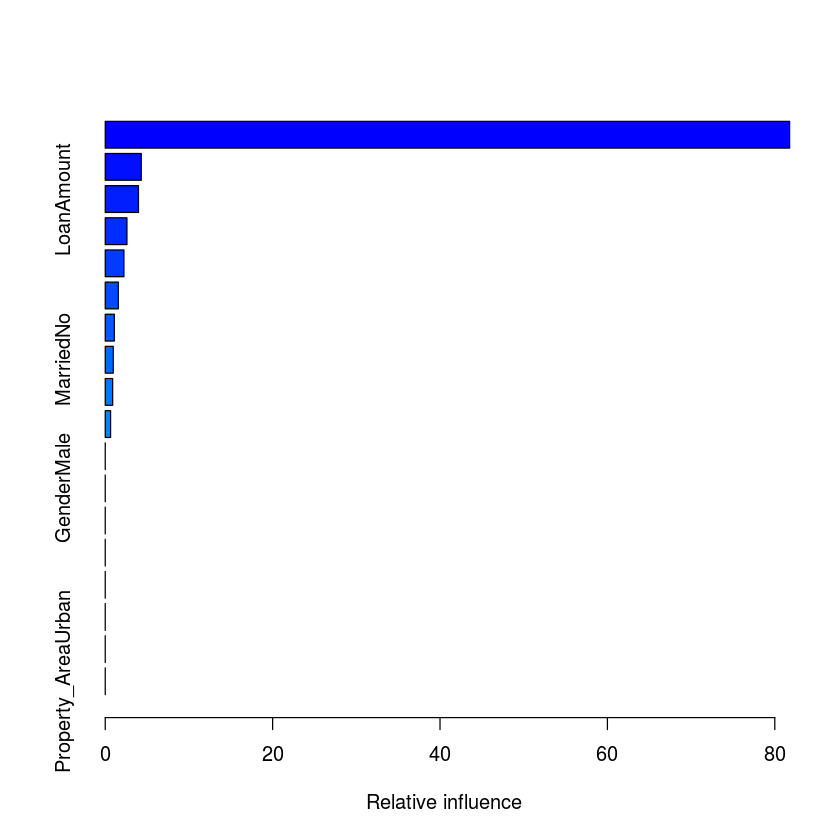

In [31]:
summary(gbmfit1)

In [43]:
dim(test.loan)

[1] 367  12

In [50]:
gbm_test <- predict(gbmfit1, test.loan, type="raw" )

In [51]:
str(gbm_test)

 Factor w/ 2 levels "N","Y": 2 2 2 1 2 2 2 1 2 2 ...


In [56]:
Sub_files <- as.character(test.loan$Loan_ID)

In [58]:
Sub_files <- cbind(Sub_files, as.character(gbm_test))

In [60]:
write.csv(Sub_files, file = "/home/shahan/Documents/Analytics_Vidhya/LoanPrediction/Submission_Loan_impute_gbm.csv")

In [59]:
head(Sub_files)

Sub_files,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,N
LP001051,Y
LP001054,Y
